<a href="https://colab.research.google.com/github/seongwoojang1123/TMJ-osteoarthritis-diagnosis-/blob/main/3_Image_initial_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import zipfile
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageEnhance

In [8]:
# 이미지 루트 경로 설정
image_root = '/content/drive/MyDrive/TMJ OA/학습_data_1,3(crop)'

# 데이터셋 단계 설정
stages = ['train_data', 'validation_data', 'test_data']

# 서브폴더 이름 리스트
subfolders = ['Lt_Normal', 'Lt_OA', 'Rt_Normal', 'Rt_OA']

# 레이블 저장 딕셔너리 초기화
labels = {}
labels['total'] = []

for stage in stages:
    labels[stage] = []

# 이미지 수집 및 레이블 처리 함수 정의
def collect_and_process_images(base_path, subfolders, labels_dict, stage_name):
    for subfolder in subfolders:
        subfolder_path = os.path.join(base_path, subfolder)
        if os.path.isdir(subfolder_path):
            for image in os.listdir(subfolder_path):
                if image.lower().endswith('.jpg'):
                    try:
                        # 파일명에서 pt_no와 label 추출
                        pt_no, label_ext = image.split(' ')
                        # 레이블 추출 (예: '0.jpg'에서 '0' 추출)
                        label = int(label_ext.split('.jpg')[0][0])

                        # 레이블 매핑
                        if label in [0, 1]:
                            mapped_label = 0
                        elif label in [2, 3]:
                            mapped_label = 1
                        else:
                            print(f"예상치 못한 레이블: {label} in 파일 {image}")
                            continue

                        # 레이블 저장
                        labels_dict[stage_name].append(mapped_label)
                        labels_dict['total'].append(mapped_label)
                    except ValueError:
                        print(f"파일명 변환 오류: {image}")
                        continue

# 각 단계별로 이미지 수집 및 레이블 처리 수행
for stage in stages:
    stage_path = os.path.join(image_root, stage)
    collect_and_process_images(stage_path, subfolders, labels, stage)

# 결과 출력
print(f"Train images: {len(labels['train_data'])}")
print(f"Validation images: {len(labels['validation_data'])}")
print(f"Test images: {len(labels['test_data'])}")
print(f"Total images: {len(labels['total'])}")
print(f"Sum of train labels: {np.array(labels['train_data']).sum()}")
print(f"Sum of validation labels: {np.array(labels['validation_data']).sum()}")
print(f"Sum of test labels: {np.array(labels['test_data']).sum()}")
print(f"Sum of total labels: {np.array(labels['total']).sum()}")
print(f"Total number of samples: {len(labels['total'])}")

Train images: 1210
Validation images: 405
Test images: 405
Total images: 2020
Sum of train labels: 605
Sum of validation labels: 202
Sum of test labels: 202
Sum of total labels: 1009
Total number of samples: 2020


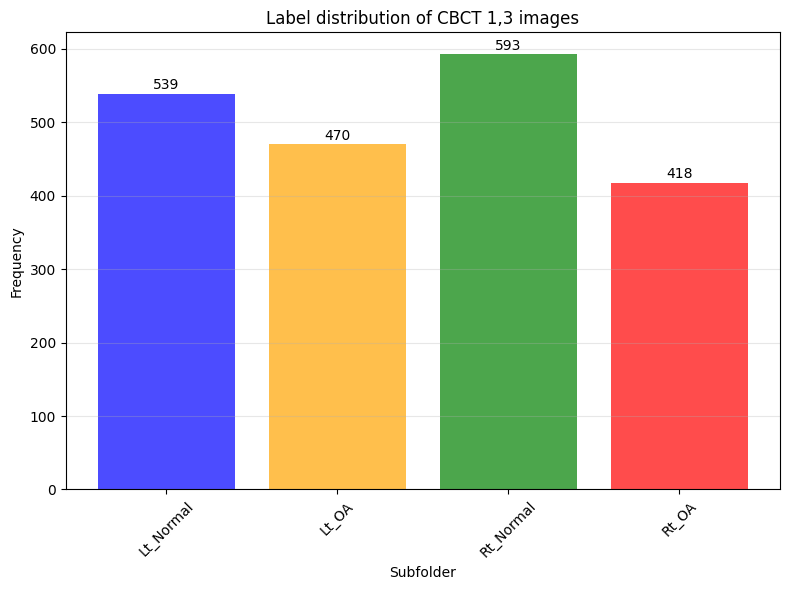

In [9]:
# 서브폴더별 데이터를 저장할 딕셔너리 초기화
subfolder_labels = {'Lt_Normal': [], 'Lt_OA': [], 'Rt_Normal': [], 'Rt_OA': []}

# 데이터 분리
for subfolder in subfolders:
    for stage in stages:
        stage_path = os.path.join(image_root, stage, subfolder)
        if os.path.isdir(stage_path):
            for image in os.listdir(stage_path):
                if image.lower().endswith('.jpg'):
                    try:
                        _, label_ext = image.split(' ')
                        label = int(label_ext.split('.jpg')[0][0])
                        if label in [0, 1]:
                            subfolder_labels[subfolder].append(0)
                        elif label in [2, 3]:
                            subfolder_labels[subfolder].append(1)
                    except ValueError:
                        continue

# 2. 서브폴더별 막대그래프
plt.figure(figsize=(8, 6))
plt.title("Label distribution of CBCT 1,3 images")

x_labels = list(subfolder_labels.keys())
frequencies = [len(data) for data in subfolder_labels.values()]

# 막대그래프 그리기
bars = plt.bar(x_labels, frequencies, color=['blue', 'orange', 'green', 'red'], alpha=0.7)

# 각 막대 위에 수량 표시
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, str(freq),
             ha='center', va='bottom', fontsize=10)

# 축 및 제목 설정
plt.xlabel("Subfolder")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

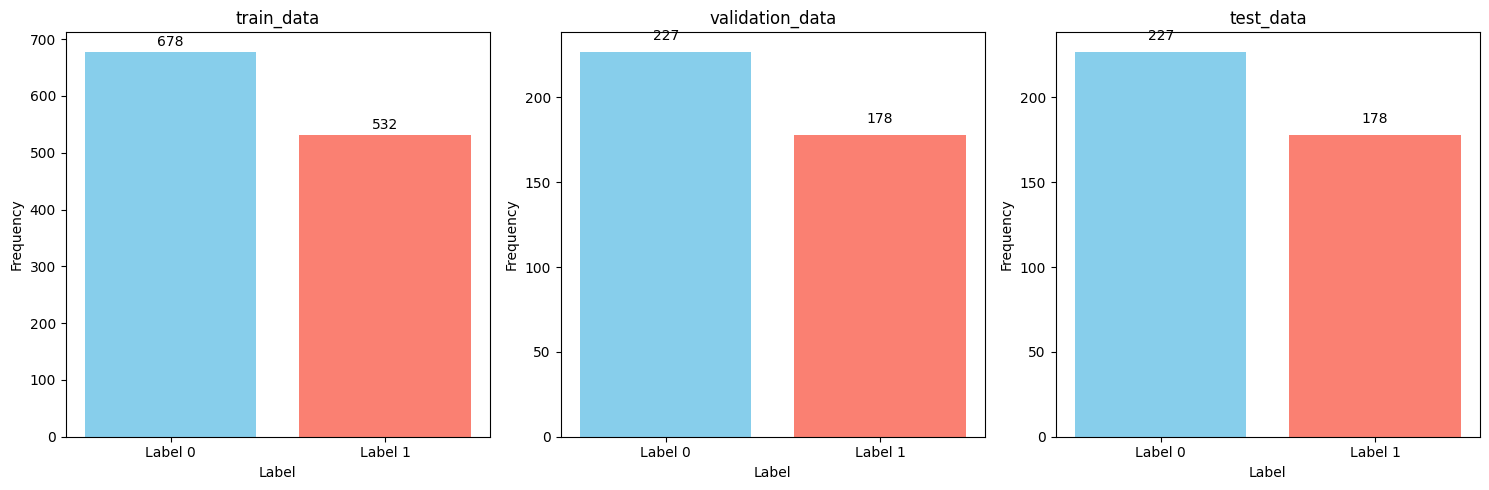

In [11]:
# 경로 설정
image_root = '/content/drive/MyDrive/TMJ OA/학습_data_1,3(crop)'
stages = ['train_data', 'validation_data', 'test_data']
subfolders = {'Lt_Normal': 0, 'Rt_Normal': 0, 'Lt_OA': 1, 'Rt_OA': 1}  # 서브폴더와 Label 매핑

# 단계별 Label 수량 저장
label_counts = {stage: {0: 0, 1: 0} for stage in stages}

# 이미지 데이터 레이블링 및 수량 계산
for stage in stages:
    stage_path = os.path.join(image_root, stage)
    for subfolder, label in subfolders.items():
        subfolder_path = os.path.join(stage_path, subfolder)
        if os.path.exists(subfolder_path):
            count = len([img for img in os.listdir(subfolder_path) if img.lower().endswith('.jpg')])
            label_counts[stage][label] += count

# 그래프 시각화
plt.figure(figsize=(15, 5))

for i, stage in enumerate(stages):
    plt.subplot(1, 3, i + 1)
    plt.title(stage)

    # Label 0과 Label 1의 수량
    labels = ['Label 0', 'Label 1']
    counts = [label_counts[stage][0], label_counts[stage][1]]

    # 막대그래프 그리기
    bars = plt.bar(labels, counts, color=['skyblue', 'salmon'])

    # 각 막대에 수량 표기
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=10)

    plt.xlabel('Label')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

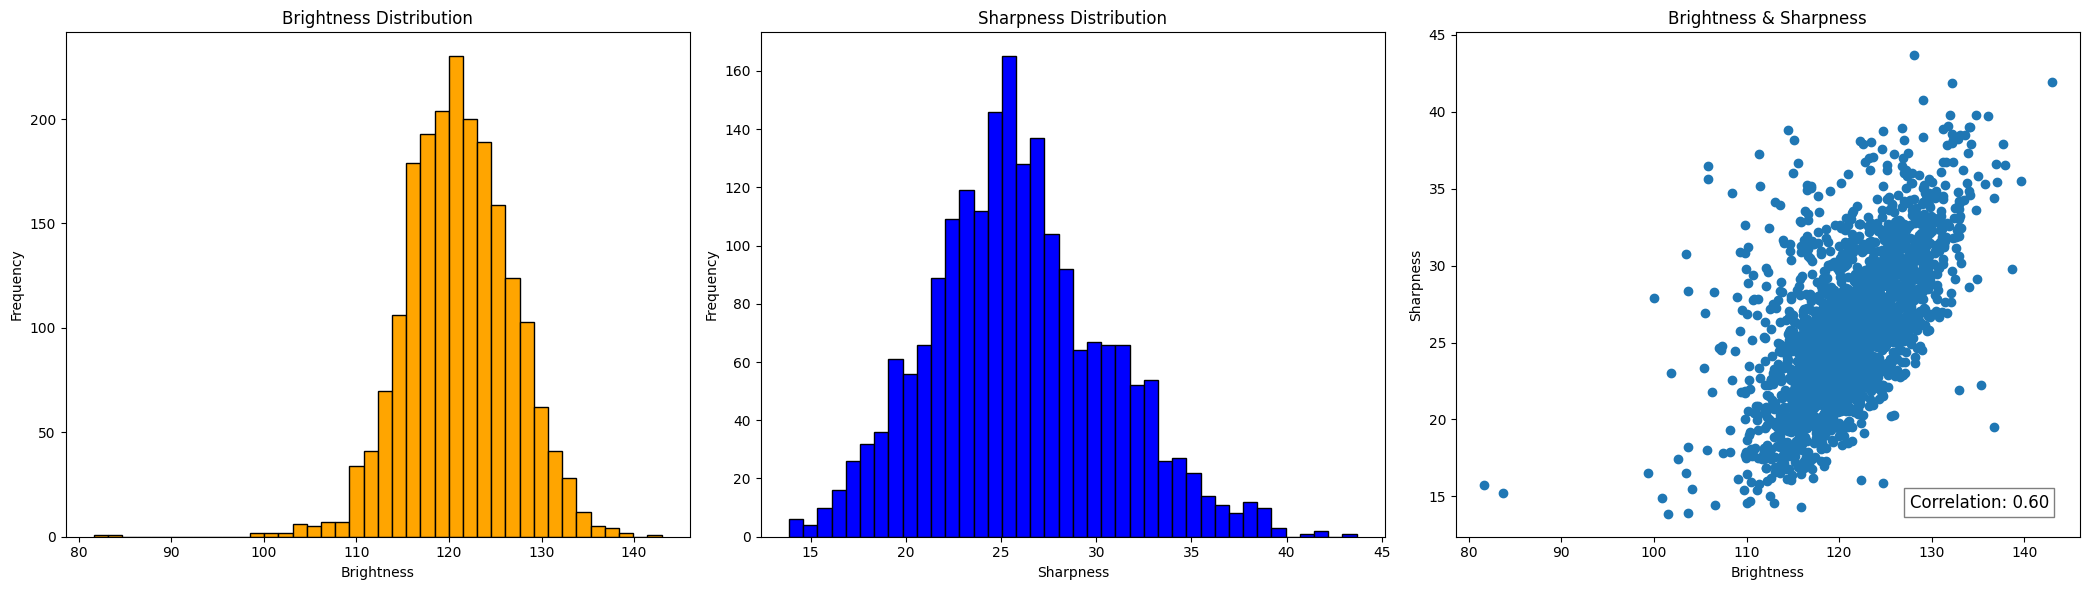

In [3]:
# 밝기 계산 함수
def calculate_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv[:, :, 2].mean()

# 선명도 계산 함수
def calculate_sharpness(image):
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Sharpness(image_pil)
    sharpness = np.array(enhancer.enhance(1).convert('L')).std()
    return sharpness

# 이미지 경로 필터링 및 데이터 로드
def load_images_from_folder(folder_path):
    image_paths = []
    for subdir, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_paths.append(os.path.join(subdir, file_name))
    return image_paths

# 분석 및 시각화
def analyze_images(image_paths):
    brightness_values = []
    sharpness_values = []

    for path in image_paths:
        image = cv2.imread(path)
        if image is not None:
            brightness = calculate_brightness(image)
            brightness_values.append(brightness)

            sharpness = calculate_sharpness(image)
            sharpness_values.append(sharpness)

    # 히스토그램 그리기
    plt.figure(figsize=(21, 6))

    # 밝기 히스토그램
    plt.subplot(1, 3, 1)
    plt.hist(brightness_values, bins=40, color='orange', edgecolor='black')
    plt.title('Brightness Distribution')
    plt.xlabel('Brightness')
    plt.ylabel('Frequency')

    # 선명도 히스토그램
    plt.subplot(1, 3, 2)
    plt.hist(sharpness_values, bins=40, color='blue', edgecolor='black')
    plt.title('Sharpness Distribution')
    plt.xlabel('Sharpness')
    plt.ylabel('Frequency')

    # 밝기와 선명도 산점도
    plt.subplot(1, 3, 3)
    plt.scatter(brightness_values, sharpness_values)
    plt.title('Brightness & Sharpness')
    plt.xlabel('Brightness')
    plt.ylabel('Sharpness')

    # 상관계수 계산 및 표시
    correlation_coef = np.corrcoef(brightness_values, sharpness_values)[0, 1]
    plt.text(0.95, 0.05, f'Correlation: {correlation_coef:.2f}',
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom',
             horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

# TMJ OA 폴더 경로
tmj_folder = "/content/drive/MyDrive/TMJ OA/학습_data_1,3(crop)"  # 환경에 맞게 수정

# 이미지 경로 로드
image_paths = load_images_from_folder(tmj_folder)

# 이미지 분석 및 결과 시각화
analyze_images(image_paths)

밝기 및 선명도 분석 완료.
분석된 Brightness values: [116.86098461538461, 119.62233846153846, 123.0819076923077, 120.49661538461538, 124.08184615384616]
분석된 Sharpness values: [24.96103420471584, 26.37405402300755, 22.581310149170214, 24.64313206098502, 34.36046847053737]


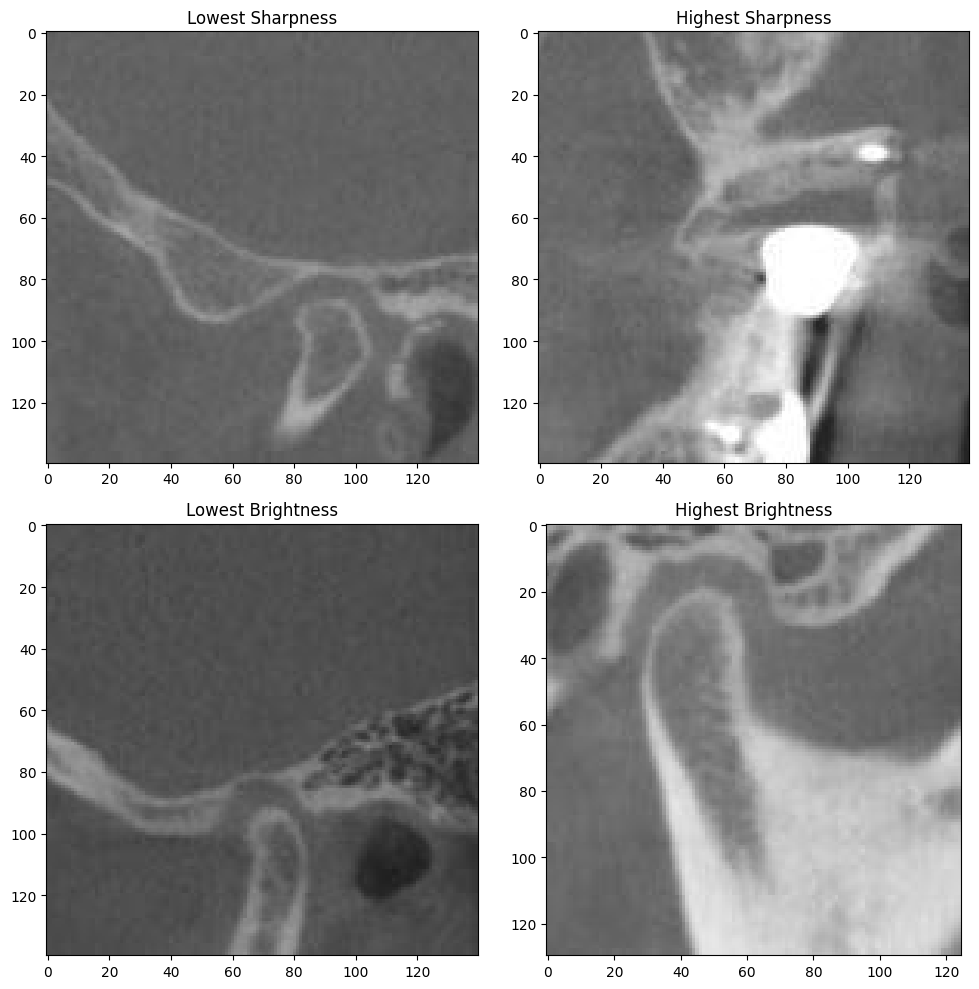

In [4]:
brightness_values = []
sharpness_values = []

for path in image_paths:
    image = cv2.imread(path)
    if image is not None:
        try:
            # 밝기 계산
            brightness = calculate_brightness(image)
            brightness_values.append(brightness)

            # 선명도 계산
            sharpness = calculate_sharpness(image)
            sharpness_values.append(sharpness)
        except Exception as e:
            print(f"이미지 분석 실패: {path}, 오류: {e}")
    else:
        print(f"이미지를 로드할 수 없습니다: {path}")

print("밝기 및 선명도 분석 완료.")
print(f"분석된 Brightness values: {brightness_values[:5]}")
print(f"분석된 Sharpness values: {sharpness_values[:5]}")


# 가장 낮고 높은 선명도를 가진 이미지
min_sharpness_idx = np.argmin(sharpness_values)
max_sharpness_idx = np.argmax(sharpness_values)

# 가장 낮고 높은 밝기를 가진 이미지
min_brightness_idx = np.argmin(brightness_values)
max_brightness_idx = np.argmax(brightness_values)

# 이미지 보여주기
plt.figure(figsize=(10, 10))

# 선명도가 가장 낮은 이미지
plt.subplot(2, 2, 1)
image = cv2.imread(image_paths[min_sharpness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lowest Sharpness')

# 선명도가 가장 높은 이미지
plt.subplot(2, 2, 2)
image = cv2.imread(image_paths[max_sharpness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Highest Sharpness')

# 밝기가 가장 낮은 이미지
plt.subplot(2, 2, 3)
image = cv2.imread(image_paths[min_brightness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lowest Brightness')

# 밝기가 가장 높은 이미지
plt.subplot(2, 2, 4)
image = cv2.imread(image_paths[max_brightness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Highest Brightness')

plt.tight_layout()
plt.show()